In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Cardiovascular dataset.csv to Cardiovascular dataset.csv


In [ ]:
health = pd.read_csv('Cardiovascular dataset.csv', sep=';')

In [ ]:
health

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
# 1. What is the shape of the dataset?
health.shape

(70000, 13)

<Axes: >

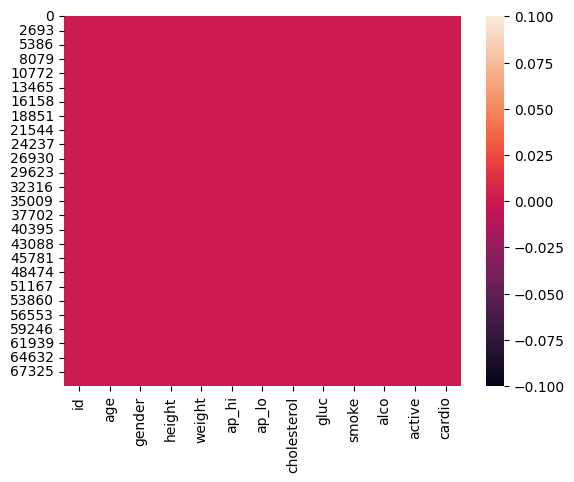

In [ ]:
# 2. Are there any missing values in the dataset?
sns.heatmap(health.isnull())

# no, there is not any missing values in the dataset.

## **no, there is not any missing values in the dataset**

gender: [2 1]
cholestrol: [1 3 2]
glucose: [1 2 3]


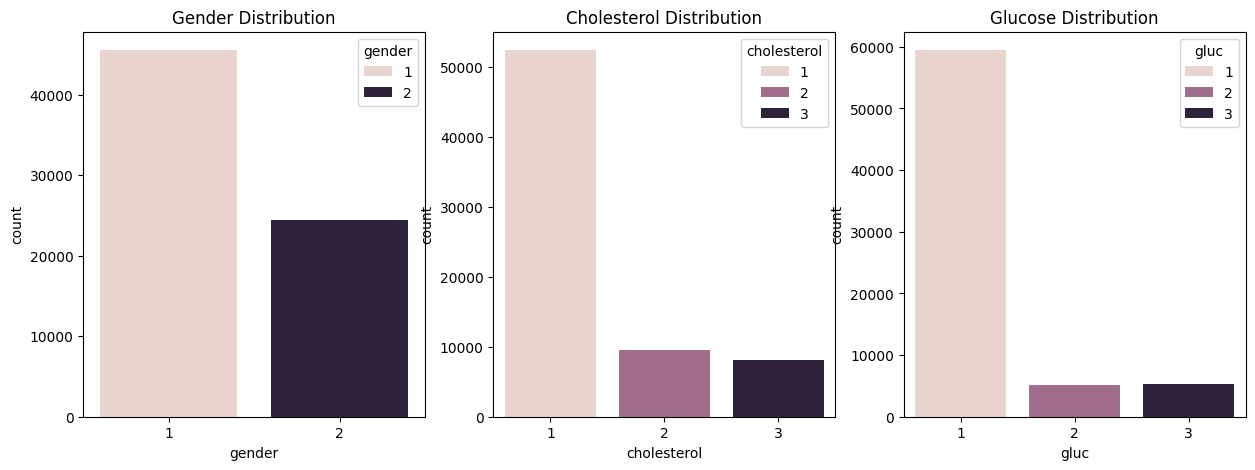

In [ ]:
# 3. What are the unique values for categorical features like gender, cholesterol, gluc?

print('gender:',health['gender'].unique())
print('cholestrol:',health['cholesterol'].unique())
print('glucose:',health['gluc'].unique())


fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.countplot(data=health, x="gender", ax=axes[0],hue='gender')
axes[0].set_title("Gender Distribution")

sns.countplot(data=health, x="cholesterol", ax=axes[1],hue='cholesterol')
axes[1].set_title("Cholesterol Distribution")

sns.countplot(data=health, x="gluc", ax=axes[2],hue='gluc')
axes[2].set_title("Glucose Distribution")


plt.show()


/tmp/ipython-input-1507431819.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


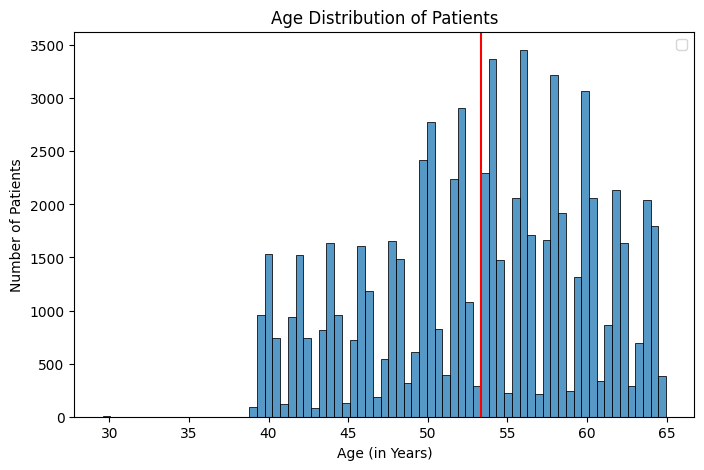

In [ ]:
# 4. What’s the average age of patients (in years)
health['age_years'] = health['age']/365.0
avg_age=health['age_years'].mean()

plt.figure(figsize=(8,5))
sns.histplot(health['age_years'])

plt.title("Age Distribution of Patients")
plt.xlabel("Age (in Years)")
plt.ylabel("Number of Patients")

plt.axvline(avg_age, color='red')
plt.legend()

plt.show()

## **the average age of patients in years is around 53.33 years.**

cardio
0    35021
1    34979
Name: count, dtype: int64


Text(0, 0.5, 'Number of Patients')

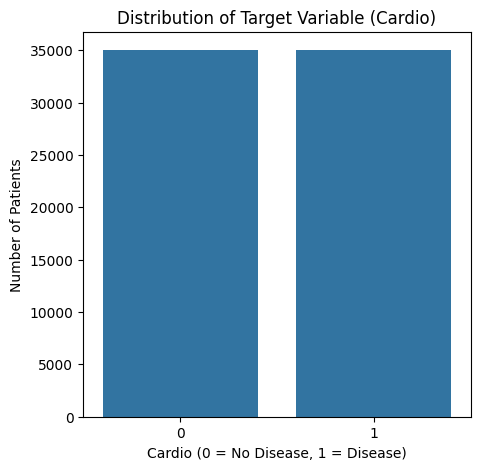

In [ ]:
#5. What is the distribution of the target variable (cardio)?
print(health['cardio'].value_counts())
plt.figure(figsize=(5,5))
sns.countplot(data=health, x="cardio")


plt.title("Distribution of Target Variable (Cardio)")
plt.xlabel("Cardio (0 = No Disease, 1 = Disease)")
plt.ylabel("Number of Patients")


**35021 people have cardio disease while  34979 don't.**

In [ ]:
# 6. What is the average age (in years) of patients?
age_years = health['age']/365.0
age_years.mean()

np.float64(53.33935839530333)

 **the average age of patients in years is 53.33 years**

In [ ]:
# 7. What is the distribution of BMI? (Create new BMI feature)
health['BMI'] = health['weight'] / ((health['height'] / 100) ** 2)
plt.figure(figsize=(8,5))
sns.histplot(health['BMI'],kde=True,color="purple")

plt.title("BMI Distribution of Patients")
plt.xlabel("BMI")
plt.ylabel("Number of Patients")
plt.legend()
plt.show()

NameError: name 'health' is not defined

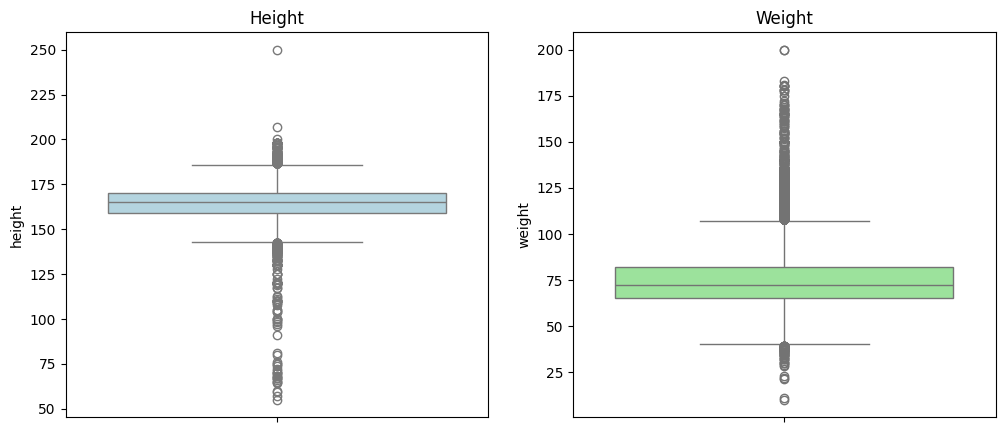

In [ ]:
# 8. Are there any outliers in height or weight?
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(y=health['height'], color="lightblue")
plt.title("Height")

plt.subplot(1,2,2)
sns.boxplot(y=health['weight'], color="lightgreen")
plt.title("Weight")
plt.show()


**yes, there are some outliers in height and weight**

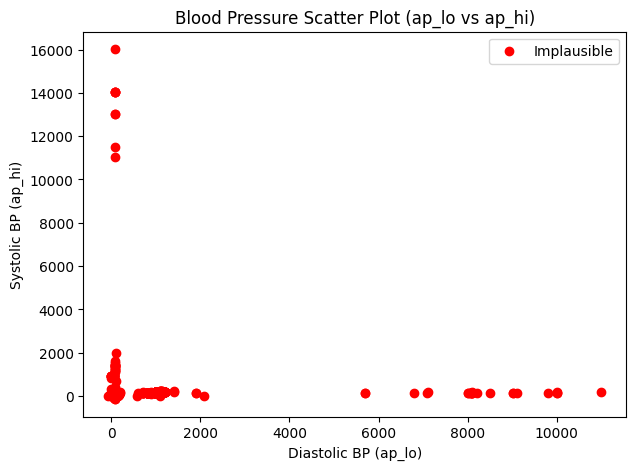

In [ ]:
#9.  Are there implausible blood pressure values (e.g., ap_hi < ap_lo or too high)?
implausible = health[(health['ap_hi'] < health['ap_lo']) |
                 (health['ap_hi'] > 250) | (health['ap_hi'] < 50) |
                 (health['ap_lo'] > 200) | (health['ap_lo'] < 30)]

plt.figure(figsize=(7,5))
sns.scatterplot(x=health['ap_lo'], y=health['ap_hi'])
plt.title("Blood Pressure Scatter Plot (ap_lo vs ap_hi)")
plt.xlabel("Diastolic BP (ap_lo)")
plt.ylabel("Systolic BP (ap_hi)")


plt.scatter(implausible['ap_lo'], implausible['ap_hi'], color='red', label="Implausible")
plt.legend()
plt.show()

**yes, in this data, we can see impausible blood pressure values**

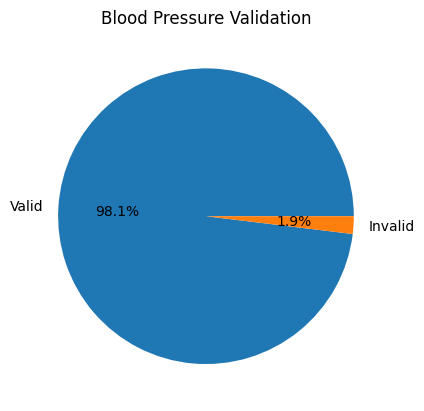

In [ ]:
# 10.  How many rows have incorrect blood pressure values?
#Column             Condition                                     Reason
#ap_hi              between 80 and 250                     realistic systolic
#ap_lo              between 50 and 200                     realistic diastolic
#ap_hi >= ap_lo     systolic must be ≥ diastolic           logical


bp_valid = ((health['ap_hi'].between(80, 250)) &
                  (health['ap_lo'].between(50, 200)) &
                  (health['ap_hi'] >= health['ap_lo']))
plt.pie(bp_valid.value_counts(), labels=['Valid', 'Invalid'], autopct='%1.1f%%')
plt.title('Blood Pressure Validation')
plt.show()

**Around 2% rows have invalid blood pressure values**

In [ ]:
# 11. Remove rows with invalid blood pressure, height, or weight?
#Height between 120cm to 220cm
#Weight between 40 to 200kg

valid_rows = ((health['ap_hi'].between(80, 250)) &
            (health['ap_lo'].between(50, 200)) &
            (health['ap_hi'] >= health['ap_lo'])) & (health['height'].between(120, 220)) & (health['weight'].between(40, 200))

clean = health[valid_rows]

print("Original rows:", health.shape[0])
print("Cleaned rows:", clean.shape[0])
print("Removed rows:", health.shape[0] - clean.shape[0])


Original rows: 70000
Cleaned rows: 68553
Removed rows: 1447


**here, i have removed 1447 rows due to invalid blood presure, height or weight**

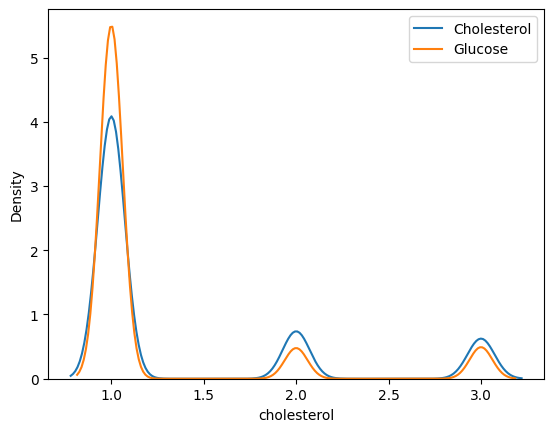

In [ ]:
# 12. What is the distribution of cholesterol and glucose levels after cleaning?
sns.kdeplot(clean['cholesterol'], label='Cholesterol')
sns.kdeplot(clean['gluc'], label='Glucose')
plt.legend()
plt.show()



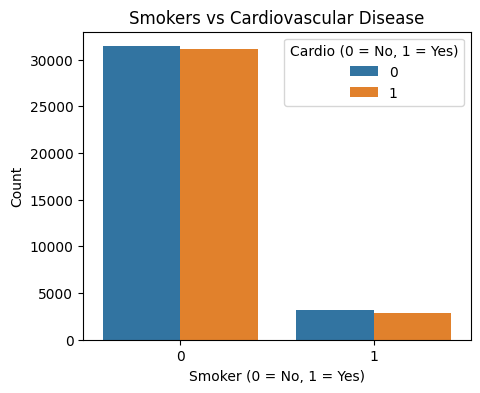

In [ ]:
# 13. How many smokers have cardiovascular disease?
plt.figure(figsize=(5,4))
sns.countplot(x='smoke', hue='cardio', data=clean)
plt.title("Smokers vs Cardiovascular Disease")
plt.xlabel("Smoker (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.legend(title="Cardio (0 = No, 1 = Yes)")
plt.show()

**there are 2925 smokers who have cardiovascular disease.**

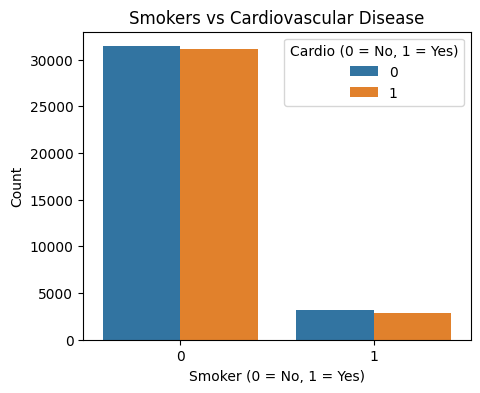

In [ ]:
# 14.  Does alcohol intake correlate with higher cardio risk?
plt.figure(figsize=(5,4))
sns.countplot(x='smoke', hue='cardio', data=clean)
plt.title("Smokers vs Cardiovascular Disease")
plt.xlabel("Smoker (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.legend(title="Cardio (0 = No, 1 = Yes)")
plt.show()

**Alcohol intake highly correlates with cardiovascular disease**

In [ ]:
# 15.What’s the correlation between features?


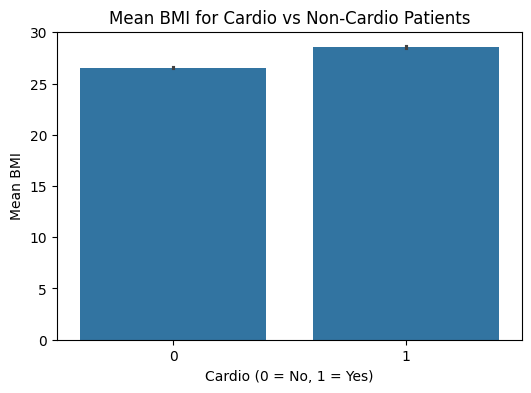

In [ ]:
# 16.  Compare mean BMI for cardio vs. non-cardio
BMI = health['weight']/(health['height']/100)**2
health['BMI'] = BMI
plt.figure(figsize=(6,4))
sns.barplot(x='cardio', y='BMI', data=health)
plt.title("Mean BMI for Cardio vs Non-Cardio Patients")
plt.xlabel("Cardio (0 = No, 1 = Yes)")
plt.ylabel("Mean BMI")
plt.show()



**BMI of cardio patients is higher than non cardio patients**

/tmp/ipython-input-1029605440.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Cardio (0 = No, 1 = Yes)")


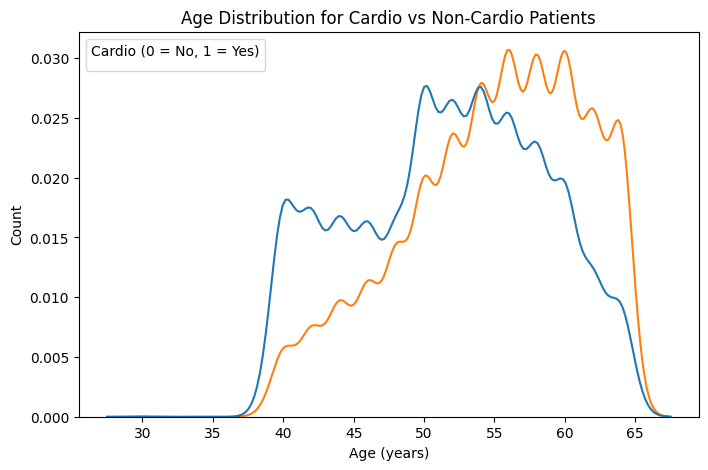

In [ ]:
# 17. Plot age distribution for those with and without cardio disease
health['age_years'] = (health['age'] / 365).round()
plt.figure(figsize=(8,5))
sns.kdeplot(data=health, x='age_years', hue='cardio')
plt.title("Age Distribution for Cardio vs Non-Cardio Patients")
plt.xlabel("Age (years)")
plt.ylabel("Count")
plt.legend(title="Cardio (0 = No, 1 = Yes)")
plt.show()


**Basically, non cardio patients live longer compared to cardio patients.**

Text(0.5, 1.0, 'Boxplot of Systolic Blood Pressure by Cardio Status')

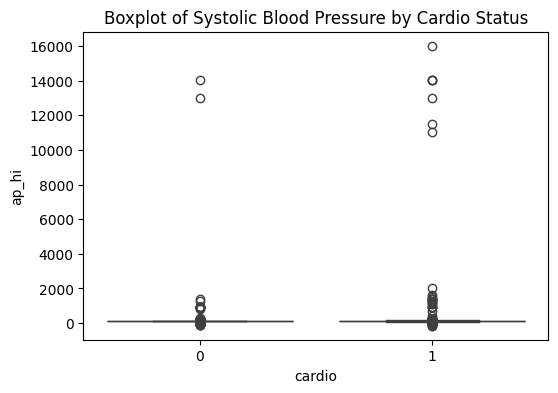

In [ ]:
# 18.Boxplot of systolic blood pressure by cardio status
plt.figure(figsize=(6,4))
sns.boxplot(x='cardio', y='ap_hi', data=health)
plt.title("Boxplot of Systolic Blood Pressure by Cardio Status")

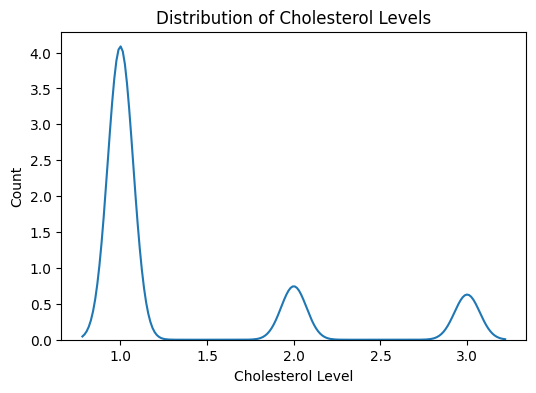

In [ ]:
# 19. What is the distribution of cholesterol levels?
plt.figure(figsize=(6,4))
sns.kdeplot(x='cholesterol', data=health)
plt.title("Distribution of Cholesterol Levels")
plt.xlabel("Cholesterol Level")
plt.ylabel("Count")
plt.show()

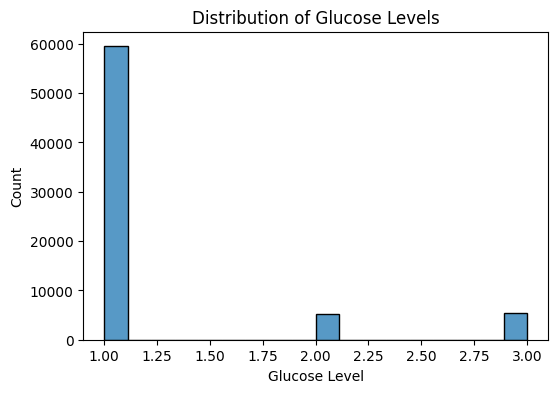

In [ ]:
# 20. What percentage of patients have above-normal glucose levels?
plt.figure(figsize=(6,4))
sns.histplot(x='gluc', data=health)
plt.title("Distribution of Glucose Levels")
plt.xlabel("Glucose Level")
plt.ylabel("Count")
plt.show()


**Around 15% people have above normal glucose level**

# **INSIGHTFUL ANALYSIS QUESTIONS**

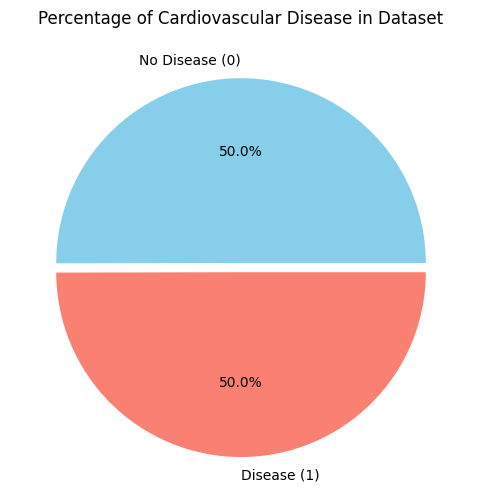

In [ ]:
# 1. What percentage of the dataset has cardiovascular disease?
plt.figure(figsize=(6,6))
health['cardio'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
  labels=['No Disease (0)','Disease (1)'],
    colors=['skyblue','salmon'],
    explode=(0,0.05)
)
plt.title("Percentage of Cardiovascular Disease in Dataset")
plt.ylabel("")
plt.show()



**50% of dataset has cardiovascular disease.**

Text(0, 0.5, 'Count')

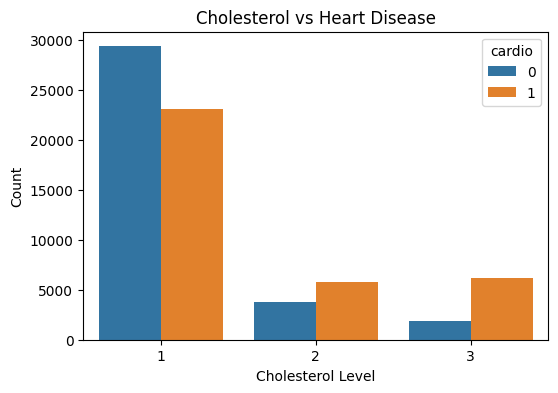

In [ ]:
#2  Is there a link between cholesterol and heart disease?
plt.figure(figsize=(6,4))
sns.countplot(x='cholesterol', hue='cardio', data=health)
plt.title("Cholesterol vs Heart Disease")
plt.xlabel("Cholesterol Level")
plt.ylabel("Count")



**yes, there is a link beetween cholestrole level and heart-disease**

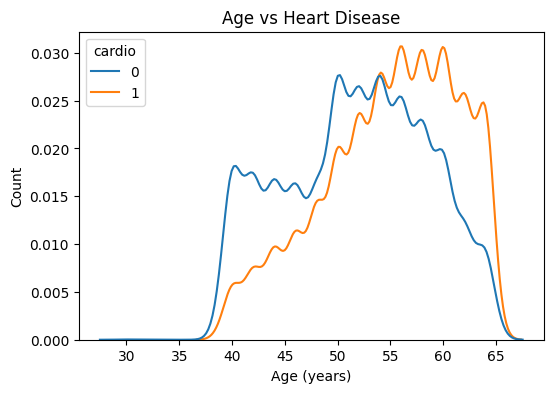

In [ ]:
# 3. Does age impact heart disease prevalence?
plt.figure(figsize=(6,4))
sns.kdeplot(x='age_years', hue='cardio', data=health)
plt.title("Age vs Heart Disease")
plt.xlabel("Age (years)")
plt.ylabel("Count")
plt.show()

Text(0.5, 1.0, 'BMI vs Heart Disease')

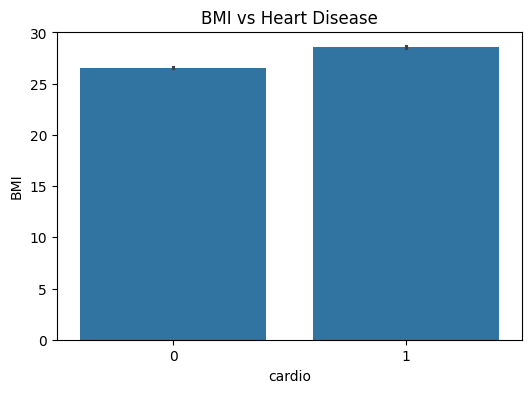

In [ ]:
#4. Is BMI higher in those with heart disease?
plt.figure(figsize=(6,4))
sns.barplot(x='cardio', y='BMI', data=health)
plt.title("BMI vs Heart Disease")



**Heart patients have higher BMI comparitively.**

Text(0.5, 1.0, 'Physical Activity vs Heart Disease')

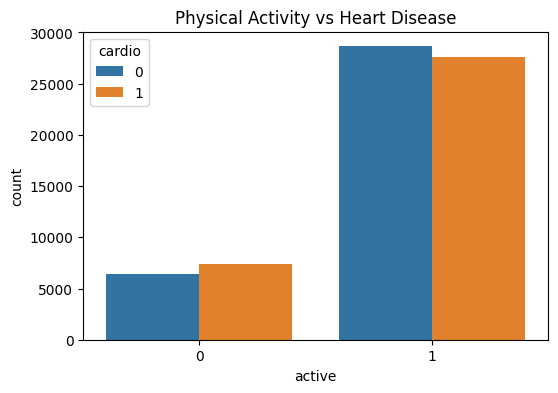

In [ ]:
# 5.  Does physical activity reduce heart disease risk?
plt.figure(figsize=(6,4))
sns.countplot(x='active', hue='cardio', data=health)
plt.title("Physical Activity vs Heart Disease")

**Physical activity reduces the risk of heart disease**

Text(0.5, 1.0, 'Smoking vs Heart Disease')

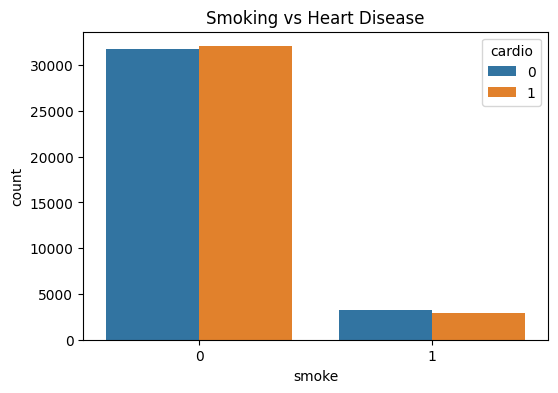

In [ ]:
# 6. Do smokers have more heart disease?
plt.figure(figsize=(6,4))
sns.countplot(x='smoke', hue='cardio', data=health)
plt.title("Smoking vs Heart Disease")


Text(0.5, 1.0, 'Systolic Pressure vs Heart Disease')

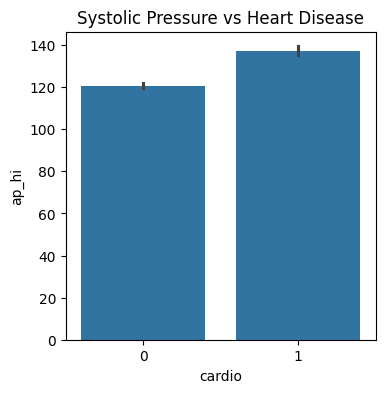

In [ ]:
#7. Is systolic pressure significantly higher in those with heart disease
plt.figure(figsize=(4,4))
sns.barplot(x='cardio', y='ap_hi', data=health)
plt.title("Systolic Pressure vs Heart Disease")

**Systolic blood pressure is significantly higher in heart patients**